<a href="https://colab.research.google.com/github/Mr-MaNia7/genus/blob/version1/Algorithms_%26_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Pre**


In [1]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('final_dataset_noise (7).csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,tizta_001.wav,0.247649,0.170541,1173.567698,1589.101382,1825.822293,0.050855,-175.267685,142.653900,6.672291,...,-24.468849,-9.787237,-20.809126,-4.317102,-23.036829,-2.010492,-5.480192,-0.852857,-6.093732,tizita
1,tizta_003.wav,0.359356,0.114772,2371.347112,2690.149684,5756.256859,0.077017,-158.201218,91.980019,4.436619,...,6.576199,17.908369,-8.750384,17.428303,-8.077110,31.144600,-11.995828,20.367981,-9.506892,tizita
2,tizta_002.wav,0.342325,0.191678,1858.957915,2292.546108,4072.665417,0.073601,-114.808266,112.555992,19.847651,...,1.331205,15.176805,4.586580,-4.689911,-7.867850,7.038043,-12.388121,2.277709,-12.189073,tizita
3,tizta_004.wav,0.357074,0.165511,1876.547246,2420.468747,4290.940720,0.064403,-111.474846,115.571083,18.482544,...,5.669367,15.316985,2.354102,8.839875,-11.220535,2.585573,-7.786808,3.755515,-5.750423,tizita
4,tizta_005.wav,0.279588,0.180006,1835.180973,2262.549856,4105.033511,0.069469,-106.175362,112.750389,9.016710,...,-2.695998,16.569929,-14.148991,5.439806,-16.550734,2.734846,-13.582993,8.162541,-10.529911,tizita


In [2]:
data = data.drop(labels='filename',axis=1)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

classification_group = data.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classification_group)


fit = StandardScaler()
X = fit.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
print(X.shape)
print(Y.shape)


(786, 19)
(786,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [9]:
print(y_test)

[2 3 0 0 0 1 3 0 2 1 2 0 2 0 2 0 3 3 1 3 1 1 2 0 2 0 0 1 3 0 3 2 2 2 2 1 0
 2 0 0 1 2 1 0 1 0 1 1 2 0 0 3 2 3 3 2 0 0 2 0 0 1 0 3 3 0 0 0 0 3 0 2 0 2
 3 2 2 3 3 1 0 3 3 3 3 3 2 0 0 2 1 2 2 3 2 1 1 3 0 0 0 2 0 2 2 0 2 0 3 1 3
 2 0 2 1 0 0 1 2 1 2 3 1 1 2 1 0 0 1 3 0 2 2 1 3 2 1 3 3 0 1 3 0 2 1 3 1 0
 3 2 3 2 3 1 1 3 0 2 0 2 0 3 2 0 0 3 2 0 2 2 1 2 1 1 1 3 1 1 0 1 0 3 1 0 1
 2 3 3 2 3 3 3 2 3 0 0 3 0 0 3 2 0 3 2 0 2 3 0 0 2 3 2 0 1 0 0 3 0 0 3 3 0
 2 0 0 1 0 2 1 3 0 2 0 3 1 1]


#**Classification by: eXtreme Gradiet Boosting - XGBoost**

In [114]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=26)
model.fit(X_train,y_train,eval_metric='merror')

XGBClassifier(n_estimators=26, objective='multi:softprob')

In [115]:
preds = model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
target_names = sorted(set(Y))


print(f'Training accuracy: {accuracy_score(y_train,y_pred_train) * 100}')
print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test) * 100}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 89.45454545454545
Training:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       141
           1       0.96      0.90      0.93       116
           2       0.82      0.91      0.86       140
           3       0.87      0.98      0.92       153

    accuracy                           0.89       550
   macro avg       0.91      0.89      0.89       550
weighted avg       0.90      0.89      0.89       550

Testing accuracy: 77.96610169491525
Testing:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        68
           1       0.83      0.77      0.80        44
           2       0.74      0.85      0.79        65
           3       0.72      0.90      0.80        59

    accuracy                           0.78       236
   macro avg       0.80      0.78      0.78       236
weighted avg       0.80      0.78      0.78       236



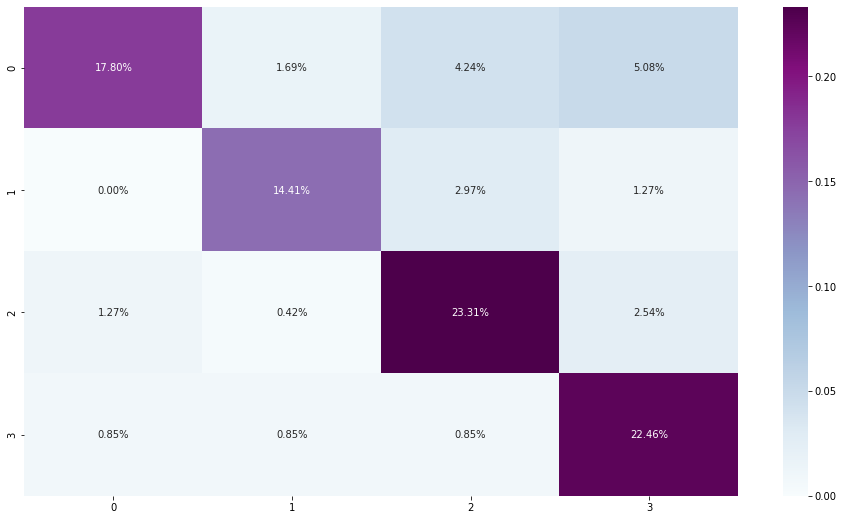

In [117]:
#Confusion matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat/np.sum(conf_mat),cmap="BuPu", fmt='.2%',annot=True, xticklabels = target_names, yticklabels = target_names )

In [118]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=9)
y_test_pred = cross_val_predict(model, X_test, y_test, cv=9)

print(f'Training accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Training:\n {classification_report(y_train, y_train_pred, labels=target_names)}')

print(f'Testing accuracy: {accuracy_score(y_test,y_test_pred)}')
print(f'Testing:\n {classification_report(y_test, y_test_pred, labels=target_names)}')


Training accuracy: 0.8127272727272727
Training:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       141
           1       0.88      0.84      0.86       116
           2       0.75      0.76      0.75       140
           3       0.81      0.93      0.86       153

    accuracy                           0.81       550
   macro avg       0.82      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550

Testing accuracy: 0.6991525423728814
Testing:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66        68
           1       0.74      0.57      0.64        44
           2       0.65      0.75      0.70        65
           3       0.73      0.83      0.78        59

    accuracy                           0.70       236
   macro avg       0.70      0.69      0.69       236
weighted avg       0.70      0.70      0.70       236



In [119]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

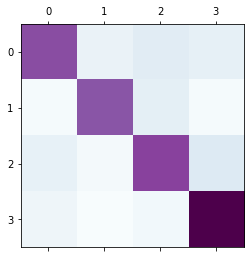

In [120]:
plt.matshow(conf_mx, cmap="BuPu")

#**Classification by: Convolutional Neural Network**

In [121]:
from tensorflow import keras
from keras.models import Sequential


In [122]:
model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])
print(model.summary())
batch_size = 32
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 25, 
                     batch_size=batch_size)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               5120      
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [123]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

8/8 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8814
The test loss is : 0.43914899230003357

The test Accuracy is : 88.13559412956238


#**Classification by: Random Forest Classifier**

In [124]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_estimators=16, max_leaf_nodes=16, n_jobs=-1)
forest.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=16, n_jobs=-1,
                       random_state=42)

In [125]:
y_pred_train2 = forest.predict(X_train)
y_pred_test2 = forest.predict(X_test)
target_names2 = sorted(set(Y))


print(f'Training accuracy: {accuracy_score(y_train,y_pred_train2)}')
print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test2)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 0.8618181818181818
Training:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       141
           1       0.96      0.90      0.93       116
           2       0.82      0.91      0.86       140
           3       0.87      0.98      0.92       153

    accuracy                           0.89       550
   macro avg       0.91      0.89      0.89       550
weighted avg       0.90      0.89      0.89       550

Testing accuracy: 0.7330508474576272
Testing:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        68
           1       0.83      0.77      0.80        44
           2       0.74      0.85      0.79        65
           3       0.72      0.90      0.80        59

    accuracy                           0.78       236
   macro avg       0.80      0.78      0.78       236
weighted avg       0.80      0.78      0.78       236



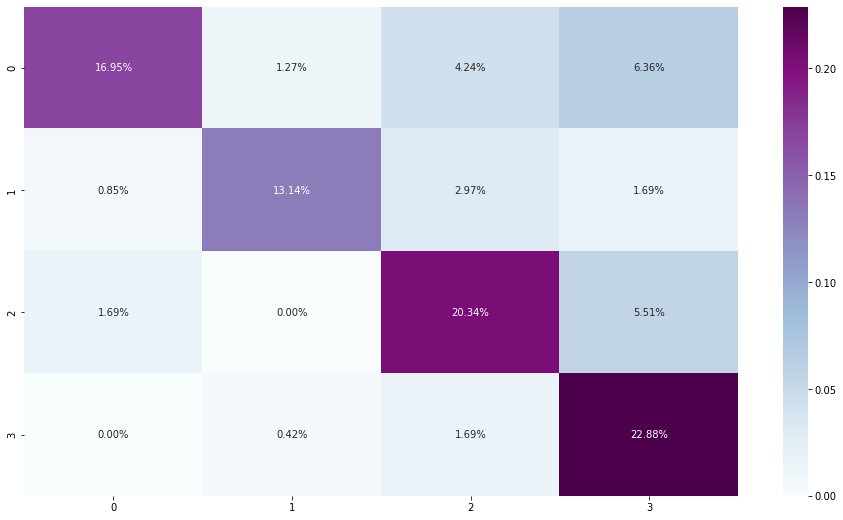

In [126]:
#Confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred_test2)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat2/np.sum(conf_mat2),cmap="BuPu", fmt='.2%',annot=True, xticklabels = target_names, yticklabels = target_names )

#**ROC CURVE**

In [127]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

pred_prob = forest.predict_proba(X_test)
y_bin = label_binarize(y_test,classes=np.unique(y_test))

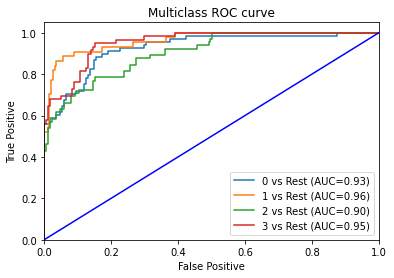

In [130]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4
classes = [i for i in range(4)]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')
plt.show()
